# Collaborative filtering

A _very_ [simple introduction to basics of recommender systems by Google](https://developers.google.com/machine-learning/recommendation/overview)

We could recommend many things:

- products at online store
- music of films
- friends in social networks
- content in social networks

![Amazon](https://github.com/v-goncharenko/madmo-adv/raw/83af16ed575aa75377b31d2e1c67288b42f46db5/09_recommendations/images/amazon.jpg)

Whole recommendations field is based on similarity concept.\
The most simple way to compute similarity is by some geometrical distance between samples. To start with it could be distance in the original feature space.

Let's try several ways to construct recommender system with this in mind.

![Imdb](https://github.com/v-goncharenko/madmo-adv/raw/255e43e0ee146c0b5c1c4cf9305abc0034fed5e2/09_recommendations/images/imdb.png)

In [1]:
import pprint

pp = pprint.PrettyPrinter(indent=4)

## Data preparation


In [2]:
critics = {
    "Toby": {
        "Snakes on a Plane": 4.5,
        "You, Me and Dupree": 1.0,
        "Superman Returns": 4.0,
    },
    "Lisa Rose": {
        "Lady in the Water": 2.5,
        "Snakes on a Plane": 3.5,
        "Just My Luck": 3.0,
        "Superman Returns": 3.5,
        "You, Me and Dupree": 2.5,
        "The Night Listener": 3.0,
    },
    "Gene Seymour": {
        "Lady in the Water": 3.0,
        "Snakes on a Plane": 3.5,
        "Just My Luck": 1.5,
        "Superman Returns": 5.0,
        "The Night Listener": 3.0,
        "You, Me and Dupree": 3.5,
    },
    "Michael Phillips": {
        "Lady in the Water": 2.5,
        "Snakes on a Plane": 3.0,
        "Superman Returns": 3.5,
        "The Night Listener": 4.0,
    },
    "Claudia Puig": {
        "Snakes on a Plane": 3.5,
        "Just My Luck": 3.0,
        "The Night Listener": 4.5,
        "Superman Returns": 4.0,
        "You, Me and Dupree": 2.5,
    },
    "Mick LaSalle": {
        "Lady in the Water": 3.0,
        "Snakes on a Plane": 4.0,
        "Just My Luck": 2.0,
        "Superman Returns": 3.0,
        "The Night Listener": 3.0,
        "You, Me and Dupree": 2.0,
    },
    "Jack Matthews": {
        "Lady in the Water": 3.0,
        "Snakes on a Plane": 4.0,
        "The Night Listener": 3.0,
        "Superman Returns": 5.0,
        "You, Me and Dupree": 3.5,
    },
}

## Similarity

We will discuss two similarities:

- Euclidean distance
- Pearson correlation

### Euclidean distance

Distance formula:
$$
\begin{equation}
d(x, y) = \sqrt{\sum_{i = 1}^n (x_i - y_i)^2}
\end{equation}
$$

Similarity function should be bigger for similar items unlike distance.\
Also we want it to be normalized (from 0 to 1), so score formula is:
$$
\text{similarity }(x, y) = \dfrac{1}{1 + d(x, y)}
$$

In [3]:
def similar_films(critics: dict, left_person: str, right_person: str):
    """Return list of films rated by both users"""
    sim_films = []

    for film in critics[left_person]:
        if film in critics[right_person]:
            sim_films.append(film)

    return sim_films

In [4]:
def sim_distance(critics: dict, left_person: str, right_person: str) -> float:
    """Calculates euclidian distance based similarity score for persons"""
    sim_films = similar_films(critics, left_person, right_person)

    if len(sim_films) == 0:
        return 0

    euclead_dist_sum = 0

    for film in sim_films:
        euclead_dist_sum += (critics[left_person][film] - critics[right_person][film])**2

    return 1 / (1 + euclead_dist_sum)

In [5]:
sim_distance(critics, "Lisa Rose", "Toby")

0.2222222222222222

In [6]:
import numpy as np

In [7]:
dist_sim_vals = np.zeros((len(critics), len(critics)))

for i, source in enumerate(critics):
    for j, referer in enumerate(critics):
        dist_sim_vals[i, j] = sim_distance(critics, source, referer)

dist_sim_vals.round(3)

array([[1.   , 0.222, 0.108, 0.286, 0.235, 0.308, 0.118],
       [0.222, 1.   , 0.148, 0.444, 0.286, 0.333, 0.211],
       [0.108, 0.148, 1.   , 0.211, 0.133, 0.129, 0.8  ],
       [0.286, 0.444, 0.211, 1.   , 0.571, 0.286, 0.182],
       [0.235, 0.286, 0.133, 0.571, 1.   , 0.174, 0.182],
       [0.308, 0.333, 0.129, 0.286, 0.174, 1.   , 0.138],
       [0.118, 0.211, 0.8  , 0.182, 0.182, 0.138, 1.   ]])

In [8]:
dist_sim_vals.mean(), dist_sim_vals.std()

(0.36752489116590853, 0.29939374254643875)

In [9]:
tirangle_mask = np.tri(len(critics), k=-1, dtype=np.bool_)

norm_dist_sim_vals = dist_sim_vals[tirangle_mask]

norm_dist_sim_vals.round(3)

array([0.222, 0.108, 0.148, 0.286, 0.444, 0.211, 0.235, 0.286, 0.133,
       0.571, 0.308, 0.333, 0.129, 0.286, 0.174, 0.118, 0.211, 0.8  ,
       0.182, 0.182, 0.138])

In [10]:
norm_dist_sim_vals.mean(), norm_dist_sim_vals.std()

(0.26211237302689333, 0.16368706645842943)

In [11]:
import matplotlib.pyplot as plt


def plot_pdf(values: np.ndarray, title: str):
    """Plots `values` distribution density"""
    plt.figure(figsize=(10, 5))
    plt.violinplot(values.flatten(), vert=False, showmedians=True)
    plt.xlabel("Similarity")
    plt.grid()
    plt.title(title)
    plt.show()

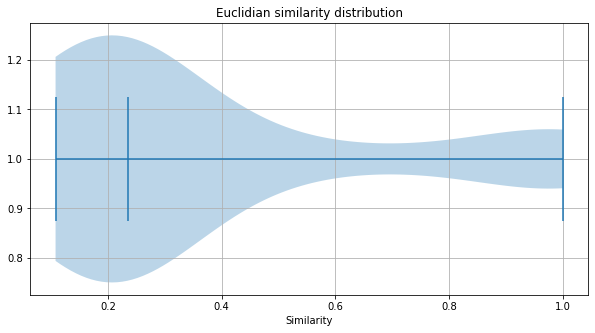

In [12]:
plot_pdf(dist_sim_vals, "Euclidian similarity distribution")

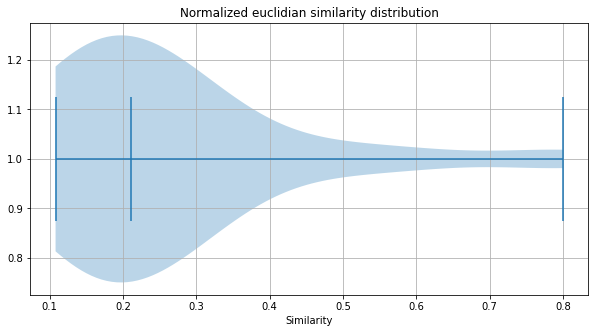

In [13]:
plot_pdf(norm_dist_sim_vals, "Normalized euclidian similarity distribution")

$$
\text{similarity}(x, y) = \dfrac{1}{1 + d(x, y)}
$$



### Parson


![](https://github.com/v-goncharenko/madmo-adv/raw/255e43e0ee146c0b5c1c4cf9305abc0034fed5e2/09_recommendations/images/pearson.jpg)

Pearson correlation is from -1 to 1, so absolute values will be different for same users, but it will reflect other type of relations between users (or items).

$$
\bar{x} = \frac{1}{n} \sum_{j = 1}^n x_j ;\ \bar{y} = \frac{1}{n} \sum_{j = 1}^n y_j \\
\text{corr}(x, y) = \dfrac{\sum_{i = 1}^n (x_i - \bar{x}) (y_i - \bar{y})}{\sqrt{\sum_{i = 1}^n (x_i - \bar{x})^2 \sum_{i = 1}^n (y_i - \bar{y})^2}}
$$

In [14]:
from math import isnan

from scipy.stats import pearsonr


def sim_pearson(critics_dict, left_person, right_person):
    """Calculates pearson correlation based similarity between persons"""
    sim_films = similar_films(critics_dict, left_person, right_person)

    if len(sim_films) < 2:
        return 0

    scores_left = []
    scores_right = []
    for film in sim_films:
        scores_left.append(critics_dict[left_person][film])
        scores_right.append(critics_dict[right_person][film])

    correlation = pearsonr(scores_left, scores_right)[0]

    return correlation

In [15]:
sim_pearson(critics, "Lisa Rose", "Gene Seymour")

0.39605901719066977

In [16]:
sim_pearson(critics, "Lisa Rose", "Toby")

0.9912407071619302

Let's investigate distribution of this similarity score

In [17]:
dist_pear_vals = np.zeros((len(critics), len(critics)))

for i, source in enumerate(critics):
    for j, referer in enumerate(critics):
        dist_pear_vals[i, j] = sim_pearson(critics, source, referer)

dist_pear_vals.round(3)

array([[ 1.   ,  0.991,  0.381, -1.   ,  0.893,  0.924,  0.663],
       [ 0.991,  1.   ,  0.396,  0.405,  0.567,  0.594,  0.747],
       [ 0.381,  0.396,  1.   ,  0.205,  0.315,  0.412,  0.964],
       [-1.   ,  0.405,  0.205,  1.   ,  1.   , -0.258,  0.135],
       [ 0.893,  0.567,  0.315,  1.   ,  1.   ,  0.567,  0.029],
       [ 0.924,  0.594,  0.412, -0.258,  0.567,  1.   ,  0.211],
       [ 0.663,  0.747,  0.964,  0.135,  0.029,  0.211,  1.   ]])

In [18]:
dist_pear_vals.mean(), dist_pear_vals.std()

(0.5159356584296166, 0.47132528276359864)

In [19]:
tirangle_mask = np.tri(len(critics), k=-1, dtype=np.bool_)

norm_pear_sim_vals = dist_pear_vals[tirangle_mask]

norm_pear_sim_vals.round(3)

array([ 0.991,  0.381,  0.396, -1.   ,  0.405,  0.205,  0.893,  0.567,
        0.315,  1.   ,  0.924,  0.594,  0.412, -0.258,  0.567,  0.663,
        0.747,  0.964,  0.135,  0.029,  0.211])

In [20]:
norm_pear_sim_vals.mean(), norm_pear_sim_vals.std()

(0.43525826816788604, 0.462179856879093)

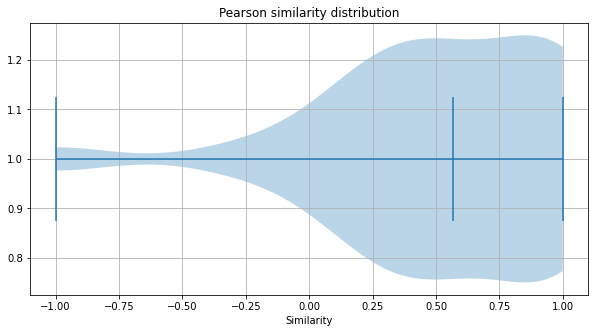

In [21]:
plot_pdf(dist_pear_vals, "Pearson similarity distribution")

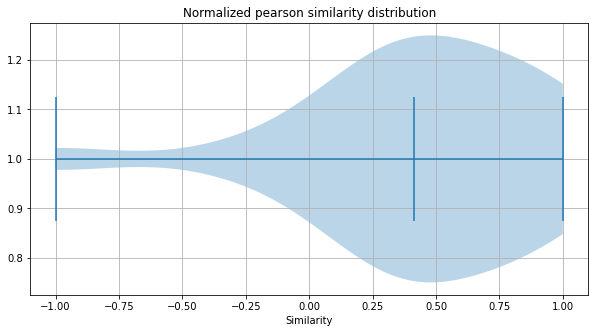

In [22]:
plot_pdf(norm_pear_sim_vals, "Normalized pearson similarity distribution")

## Ranking

In [23]:
from typing import Callable


def top_matches(
    critics: dict, person: str, n: int = 5, similarity_fn: Callable = sim_pearson
):
    """Retruns top-n most similar critics"""
    scores = []

    for other in critics:
        if other == person:
            continue

        similarity_score = similarity_fn(critics, person, other)
        scores.append((similarity_score, other))

    scores.sort(reverse=True)

    return scores[0:n]

In [24]:
top_matches(critics, "Toby", n=3, similarity_fn=sim_pearson)

[(0.9912407071619302, 'Lisa Rose'),
 (0.9244734516419049, 'Mick LaSalle'),
 (0.8934051474415643, 'Claudia Puig')]

In [25]:
pp.pprint(
    {k: v for k, v in critics.items() if k in ("Toby", "Mick LaSalle", "Lisa Rose")}
)

{   'Lisa Rose': {   'Just My Luck': 3.0,
                     'Lady in the Water': 2.5,
                     'Snakes on a Plane': 3.5,
                     'Superman Returns': 3.5,
                     'The Night Listener': 3.0,
                     'You, Me and Dupree': 2.5},
    'Mick LaSalle': {   'Just My Luck': 2.0,
                        'Lady in the Water': 3.0,
                        'Snakes on a Plane': 4.0,
                        'Superman Returns': 3.0,
                        'The Night Listener': 3.0,
                        'You, Me and Dupree': 2.0},
    'Toby': {   'Snakes on a Plane': 4.5,
                'Superman Returns': 4.0,
                'You, Me and Dupree': 1.0}}


In [26]:
top_matches(critics, "Toby", n=3, similarity_fn=sim_distance)

[(0.3076923076923077, 'Mick LaSalle'),
 (0.2857142857142857, 'Michael Phillips'),
 (0.23529411764705882, 'Claudia Puig')]

## User-based approach

<p align="center">
  <img src="https://raw.githubusercontent.com/girafe-ai/recsys/0359defc183c8394b88745675c9135cde5eca344/01_intro_collaborative_filtering/user-based-cf.png" alt="Drawing" style="width: 500px;" width="500"/>
</p>

In [35]:
def get_recommendations(prefs: dict, person: str, similarity: Callable = sim_pearson):
    """Calculates recomendations for a `person` using weighted mean from `prefs`
    """
    totals = {}
    sim_sums = {}

    for other in prefs:
        if other == person:
            continue
        sim = similarity(prefs, person, other)

        if sim <= 0:
            continue

        for item in prefs[other]:
            if item not in prefs[person] or prefs[person][item] == 0:
                totals.setdefault(item, 0)
                totals[item] = totals[item] + prefs[other][item] * sim

                sim_sums.setdefault(item, 0)
                sim_sums[item] = sim_sums[item] + sim

    rankings = [(total / sim_sums[item], item) for item, total in totals.items()]

    rankings.sort(reverse=True)
    return rankings

In [30]:
get_recommendations(critics, "Toby", sim_pearson)

[(3.347789526713101, 'The Night Listener'),
 (2.832549918264162, 'Lady in the Water'),
 (2.530980703765565, 'Just My Luck')]

In [31]:
critics["Toby"]

{'Snakes on a Plane': 4.5, 'You, Me and Dupree': 1.0, 'Superman Returns': 4.0}

In [32]:
get_recommendations(critics, "Toby", sim_distance)

[(3.5002478401415877, 'The Night Listener'),
 (2.7561242939959363, 'Lady in the Water'),
 (2.461988486074374, 'Just My Luck')]

## Item-based collaborative filtering


<p align="center">
  <img src="https://raw.githubusercontent.com/girafe-ai/recsys/4888eee47508d209f2013c4e72081fddc89453b4/01_intro_collaborative_filtering/item-based-cf.png" alt="Drawing" style="width: 500px;"/>
</p>

In [38]:
def transform_prefs(critics: dict) -> dict:
    """Inverts nested dict of critics-films-scores into films-critics-scores dict"""
    result = {}

    for person in critics:
        for item in critics[person]:
            result.setdefault(item, {})
            result[item][person] = critics[person][item]

    return result

In [39]:
def calculate_similar_items(prefs: dict, n: int = 10, similarity_fn: Callable = sim_distance):
    """Creates a dict with most similar items for each item"""
    result = {}
    item_prefs = transform_prefs(prefs)

    c = 0
    for item in item_prefs:
        c = c + 1

        scores = top_matches(item_prefs, item, n=n, similarity_fn=similarity_fn)
        result[item] = scores

        if c % 100 == 0:
            print("%d / %d" % (c, len(item_prefs)))

    return result

In [40]:
itemsim = calculate_similar_items(critics, n=10)

In [41]:
pp.pprint(itemsim)

{   'Just My Luck': [   (0.2222222222222222, 'Lady in the Water'),
                        (0.18181818181818182, 'You, Me and Dupree'),
                        (0.15384615384615385, 'The Night Listener'),
                        (0.10526315789473684, 'Snakes on a Plane'),
                        (0.06451612903225806, 'Superman Returns')],
    'Lady in the Water': [   (0.4, 'You, Me and Dupree'),
                             (0.2857142857142857, 'The Night Listener'),
                             (0.2222222222222222, 'Snakes on a Plane'),
                             (0.2222222222222222, 'Just My Luck'),
                             (0.09090909090909091, 'Superman Returns')],
    'Snakes on a Plane': [   (0.2222222222222222, 'Lady in the Water'),
                             (0.18181818181818182, 'The Night Listener'),
                             (0.16666666666666666, 'Superman Returns'),
                             (0.10526315789473684, 'Just My Luck'),
                             (

In [42]:
itemsim["Superman Returns"]

[(0.16666666666666666, 'Snakes on a Plane'),
 (0.10256410256410256, 'The Night Listener'),
 (0.09090909090909091, 'Lady in the Water'),
 (0.06451612903225806, 'Just My Luck'),
 (0.05333333333333334, 'You, Me and Dupree')]

In [43]:
critics["Toby"]

{'Snakes on a Plane': 4.5, 'You, Me and Dupree': 1.0, 'Superman Returns': 4.0}

In [45]:
def get_recommended_items(prefs: dict, item_match: dict, user: str):
    """Calculates recomendations for `user` using mean scores based on items similarity"""
    user_ratings = prefs[user]
    scores = {}
    total_sim = {}

    for item, rating in user_ratings.items():
        for similarity, item2 in item_match[item]:
            if item2 in user_ratings:
                continue

            scores.setdefault(item2, 0)
            scores[item2] = scores[item2] + similarity * rating

            total_sim.setdefault(item2, 0)
            total_sim[item2] = total_sim[item2] + similarity

            if total_sim[item2] == 0:
                total_sim[item2] = 0.0000001

    rankings = [(score / total_sim[item], item) for item, score in scores.items()]

    rankings.sort(reverse=True)

    return rankings

In [46]:
get_recommended_items(critics, itemsim, "Toby")

[(3.182634730538922, 'The Night Listener'),
 (2.5983318700614575, 'Just My Luck'),
 (2.4730878186968837, 'Lady in the Water')]

### References

Dataset borrowed from [Programming Collective Intelligence by Toby Segaran](https://books.google.ro/books?id=fEsZ3Ey-Hq4C) ([russian version](http://www.symbol.ru/alphabet/613828.html)).\
Source code from [here](https://cocalc.com/share/public_paths/66a0d74bf8b6f7b246e281a1a87fcd6a14d2ec0c) and [here](https://gist.github.com/robt/4383763)